In [5]:
# library(cowplot)
# library(datateachr)
library(digest)
library(infer)
library(repr)
# library(taxyvr)
library(tidyverse)
library(broom)
library(digest)
library(readxl)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

Warning message:
“package ‘ggplot2’ was built under R version 4.1.3”
Warning message:
“package ‘tidyr’ was built under R version 4.1.2”
Warning message:
“package ‘readr’ was built under R version 4.1.2”
Warning message:
“package ‘dplyr’ was built under R version 4.1.3”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘broom’ was built under R version 4.1.3”
Warning message:
“package ‘readxl’ was built under R version 4.1.3”


In [20]:
url <- "https://raw.githubusercontent.com/dylanc9918/STAT_201_Project/main/COVID_data_csv.csv"

covid <- 
    read_csv(url)
head(covid)

Rows: 8400 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (18): studentID, school, gradelevel, gender, covidpos, householdincome, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


studentID,school,gradelevel,gender,covidpos,householdincome,freelunch,numcomputers,familysize,fathereduc,mothereduc,readingscore,writingscore,mathscore,readingscoreSL,writingscoreSL,mathscoreSL,timeperiod
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,6,1,1,59065,0,5,3,1,0,73,69,87,85,83,71,2
1,0,6,1,1,59065,0,5,3,1,0,63,73,57,78,75,58,4
1,0,6,1,1,59065,0,5,3,1,0,80,67,57,88,80,85,1
1,0,6,1,1,59065,0,5,3,1,0,69,56,74,70,48,87,3
1,0,6,1,1,59065,0,5,3,1,0,83,87,65,69,86,66,0
1,0,6,1,1,59065,0,5,3,1,0,62,37,63,82,78,85,5


`summarise()` has grouped output by 'studentID'. You can override using the
`.groups` argument.


studentID,timeperiod,meanscore
<dbl>,<int>,<dbl>
1,0,79.22222
1,1,73.44444
2,0,73.11111
2,1,64.44444
3,0,82.55556
3,1,66.88889


timeperiod,mean
<int>,<dbl>
0,75.70167
1,67.69460


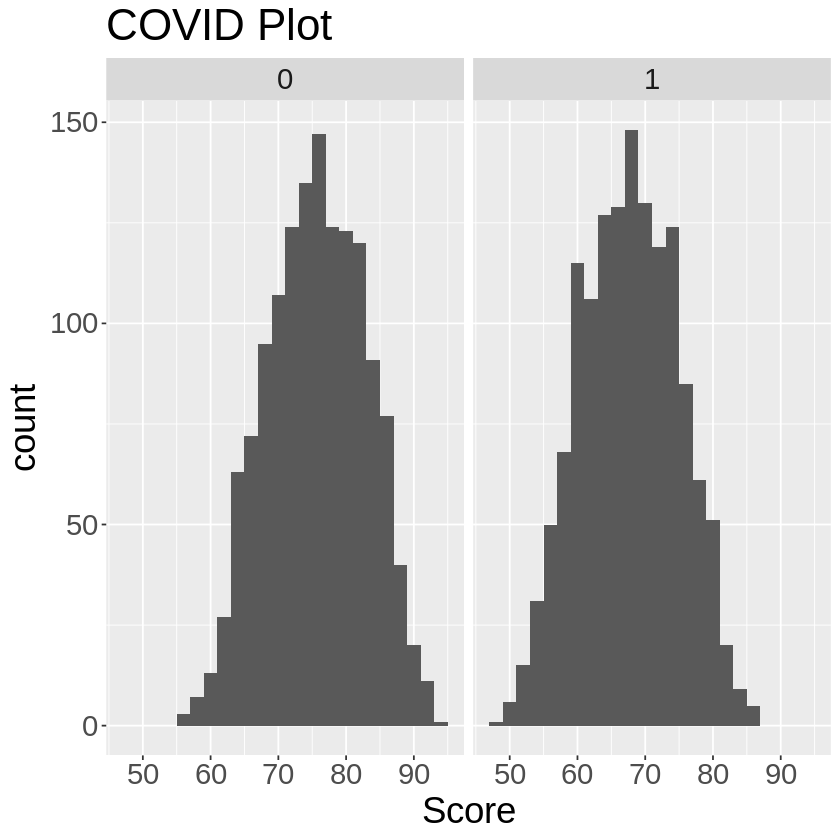

In [21]:
covid_n <- covid %>%
mutate(timeperiod = as.integer(timeperiod / 3))%>%
select("studentID", "readingscoreSL", "writingscoreSL", "mathscoreSL", "timeperiod")%>%
mutate(scoresumSL = (readingscoreSL + writingscoreSL + mathscoreSL)/3)%>%
group_by(studentID, timeperiod)%>%
summarize(meanscore = mean(scoresumSL))
head(covid_n)

covid_summarize <- covid_n%>%
group_by(timeperiod)%>%
summarize(mean = mean(meanscore))
covid_summarize


covid_samp_dist_plot <- 
    covid_n %>% 
    ggplot() + 
    geom_histogram(aes(x = meanscore), binwidth = 2) +
    facet_wrap(~ timeperiod	) + 
    xlab("Score")+
    ggtitle("COVID Plot")+
    theme(text = element_text(size = 22))
covid_samp_dist_plot
